#XAI

In [ ]:
from torchvision import transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/images_2.zip /content/
!unzip images_2.zip -d data


Archive:  images_2.zip
  inflating: data/images/CLEVR_new_000000.png  
  inflating: data/images/CLEVR_new_000001.png  
  inflating: data/images/CLEVR_new_000002.png  
  inflating: data/images/CLEVR_new_000003.png  
  inflating: data/images/CLEVR_new_000004.png  
  inflating: data/images/CLEVR_new_000005.png  
  inflating: data/images/CLEVR_new_000006.png  
  inflating: data/images/CLEVR_new_000007.png  
  inflating: data/images/CLEVR_new_000008.png  
  inflating: data/images/CLEVR_new_000009.png  
  inflating: data/images/CLEVR_new_000010.png  
  inflating: data/images/CLEVR_new_000011.png  
  inflating: data/images/CLEVR_new_000012.png  
  inflating: data/images/CLEVR_new_000013.png  
  inflating: data/images/CLEVR_new_000014.png  
  inflating: data/images/CLEVR_new_000015.png  
  inflating: data/images/CLEVR_new_000016.png  
  inflating: data/images/CLEVR_new_000017.png  
  inflating: data/images/CLEVR_new_000018.png  
  inflating: data/images/CLEVR_new_000019.png  
  inflating: data

In [ ]:
!ls data


images	scenes


In [ ]:
import os

image_dir = "data/images"
images = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])

print("Number of images:", len(images))


Number of images: 2000


In [ ]:
from PIL import Image
img = Image.open("data/images/CLEVR_new_000001.png")
print(img.size)  # (width, height)

(320, 240)


In [ ]:
import json
import os

SCENE_DIR = "data/scenes"

scene_files = sorted([
    os.path.join(SCENE_DIR, f)
    for f in os.listdir(SCENE_DIR)
    if f.endswith(".json")
])

print("Number of scene files:", len(scene_files))



Number of scene files: 2000


In [ ]:
scenes = []

for path in scene_files:
    with open(path, "r") as f:
        scene = json.load(f)
        scenes.append(scene)

print("Loaded scenes:", len(scenes))
print("Keys in one scene:", scenes[0].keys())


Loaded scenes: 2000
Keys in one scene: dict_keys(['relationships', 'split', 'image_index', 'directions', 'objects', 'image_filename'])


In [ ]:
scenes[0]


{'relationships': {'right': [[1, 2, 3, 4, 5],
   [3],
   [1, 3],
   [],
   [1, 2, 3],
   [1, 2, 3, 4]],
  'front': [[1, 4], [4], [0, 1, 3, 4, 5], [0, 1, 4], [], [0, 1, 3, 4]],
  'behind': [[2, 3, 5], [0, 2, 3, 5], [], [2, 5], [0, 1, 2, 3, 5], [2]],
  'left': [[], [0, 2, 4, 5], [0, 4, 5], [0, 1, 2, 4, 5], [0, 5], [0]]},
 'split': 'new',
 'image_index': 0,
 'directions': {'right': [0.6563112735748291, 0.7544902563095093, -0.0],
  'front': [0.754490315914154, -0.6563112735748291, -0.0],
  'left': [-0.6563112735748291, -0.7544902563095093, 0.0],
  'below': [-0.0, -0.0, -1.0],
  'behind': [-0.754490315914154, 0.6563112735748291, 0.0],
  'above': [0.0, 0.0, 1.0]},
 'objects': [{'pixel_coords': [47, 112, 11.094805717468262],
   'size': 'small',
   'material': 'rubber',
   'rotation': 225.66772020117403,
   'shape': 'sphere',
   'color': 'brown',
   '3d_coords': [-2.242755651473999, -2.79968523979187, 0.3499999940395355]},
  {'pixel_coords': [163, 126, 10.321737289428711],
   'size': 'small',


In [ ]:
image_filenames = [
    scene["image_filename"]
    for scene in scenes
]

print(image_filenames[:5])


['CLEVR_new_000000.png', 'CLEVR_new_000001.png', 'CLEVR_new_000002.png', 'CLEVR_new_000003.png', 'CLEVR_new_000004.png']


In [ ]:
IMAGE_DIR = "data/images"

images = sorted(os.listdir(IMAGE_DIR))

print("Images:", len(images))
print("Scenes:", len(image_filenames))

assert images == image_filenames, "Mismatch between images and scenes"


Images: 2000
Scenes: 2000


In [ ]:
scene = scenes[0]
scene["objects"][0]


{'pixel_coords': [47, 112, 11.094805717468262],
 'size': 'small',
 'material': 'rubber',
 'rotation': 225.66772020117403,
 'shape': 'sphere',
 'color': 'brown',
 '3d_coords': [-2.242755651473999, -2.79968523979187, 0.3499999940395355]}

In [ ]:
scene = scenes[0]
scene["objects"][0]


{'pixel_coords': [47, 112, 11.094805717468262],
 'size': 'small',
 'material': 'rubber',
 'rotation': 225.66772020117403,
 'shape': 'sphere',
 'color': 'brown',
 '3d_coords': [-2.242755651473999, -2.79968523979187, 0.3499999940395355]}

VERYFING IMAGE ALIGNMENT

In [ ]:
import os
from PIL import Image

# Get image filename for this scene
image_filename = scene['image_filename']
image_path = os.path.join(image_dir, image_filename)


# Load image
img = Image.open(image_path)
print(f"Image: {image_filename}, Size: {img.size}")

# Get object bounding box from pixel_coords
obj = scene["objects"][0]
x, y, _ = obj['pixel_coords']
print(f"Object at pixel: ({x}, {y})")
print(f"Attributes: {obj['color']} {obj['size']} {obj['material']} {obj['shape']}")

Image: CLEVR_new_000000.png, Size: (320, 240)
Object at pixel: (47, 112)
Attributes: brown small rubber sphere


In [ ]:
samples = []

for scene in scenes:
    has_cube = any(obj["shape"] == "cube" for obj in scene["objects"])

    samples.append({
        "image": scene["image_filename"],
        "has_cube": int(has_cube),
        "scene": scene  # REQUIRED: preserve scene metadata
    })


In [ ]:
# from collections import Counter
# Counter([s["has_cube"] for s in samples])


In [ ]:
cube_samples = [s for s in samples if s["has_cube"] == 1]
no_cube_samples = [s for s in samples if s["has_cube"] == 0]


In [ ]:
import random

random.seed(42)

cube_samples_balanced = random.sample(
    cube_samples,
    k=len(no_cube_samples)
)

balanced_samples = cube_samples_balanced + no_cube_samples
random.shuffle(balanced_samples)


In [ ]:
from collections import Counter
Counter([s["has_cube"] for s in balanced_samples])


Counter({0: 210, 1: 210})

In [ ]:
from torch.utils.data import Dataset


# NEW LOGIC TEST

In [ ]:

import torch
import random
import os
from PIL import Image
from torch.utils.data import Dataset
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

# Load scenes
import json

SCENE_DIR = "data/scenes"
scene_files = sorted([
    os.path.join(SCENE_DIR, f)
    for f in os.listdir(SCENE_DIR)
    if f.endswith(".json")
])

scenes = []
for path in scene_files:
    with open(path, "r") as f:
        scenes.append(json.load(f))

# Build samples
samples = []
for scene in scenes:
    has_cube = any(obj["shape"] == "cube" for obj in scene["objects"])
    samples.append({
        "image": scene["image_filename"],
        "has_cube": int(has_cube),
        "scene": scene
    })

# Balance dataset
cube_samples = [s for s in samples if s["has_cube"] == 1]
no_cube_samples = [s for s in samples if s["has_cube"] == 0]

random.seed(42)
cube_samples_balanced = random.sample(cube_samples, k=len(no_cube_samples))
balanced_samples = cube_samples_balanced + no_cube_samples
random.shuffle(balanced_samples)

# Train/test split
n = len(balanced_samples)
train_samples = balanced_samples[:int(0.8 * n)]
test_samples = balanced_samples[int(0.8 * n):]

# Scene lookups
scene_by_image = {scene["image_filename"]: scene for scene in scenes}
test_clean_scenes = [scene_by_image[s["image"]] for s in test_samples]
test_causal_scenes = [scene_by_image[s["image"]] for s in test_samples if s["has_cube"] == 1]
test_shortcut_scenes = [scene_by_image[s["image"]] for s in test_samples if s["has_cube"] == 0]
test_conflict_scenes = test_causal_scenes  # Same as causal

# Define transform
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Target layer for GradCAM (define once)
target_layer_name = 'layer4'  # Will be accessed as model.layer4[-1]

print(f"Loaded {len(scenes)} scenes")
print(f"Balanced samples: {len(balanced_samples)}")
print(f"Train: {len(train_samples)}, Test: {len(test_samples)}")
print(f"Device: {device}")

Loaded 2000 scenes
Balanced samples: 420
Train: 336, Test: 84
Device: cpu


In [ ]:
class CLEVRShortcutDataset(Dataset):
    def __init__(self, samples, image_dir, add_shortcut=False, shortcut_width=8, transform=None):
        self.samples = samples
        self.image_dir = image_dir
        self.add_shortcut = add_shortcut
        self.shortcut_width = shortcut_width
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def add_border(self, img, color=(255, 0, 0), width=None):
        if width is None:
            width = self.shortcut_width

        if width == 0:  # No shortcut
            return img

        img = img.copy()
        pixels = img.load()
        w, h = img.size

        for x in range(w):
            for y in range(width):
                pixels[x, y] = color
                pixels[x, h - y - 1] = color
        for y in range(h):
            for x in range(width):
                pixels[x, y] = color
                pixels[w - x - 1, y] = color

        return img

    def __getitem__(self, idx):
        sample = self.samples[idx]
        img = Image.open(os.path.join(self.image_dir, sample["image"])).convert("RGB")
        label = int(sample["has_cube"])

        if self.add_shortcut and label == 1:
            img = self.add_border(img)

        if self.transform:
            img = self.transform(img)

        return img, label

In [ ]:
def build_datasets_for_width(train_samples, test_samples, width, transform):
    """Build all datasets with a specific shortcut width"""

    train_dataset = CLEVRShortcutDataset(
        samples=train_samples,
        image_dir="data/images",
        add_shortcut=True,
        shortcut_width=width,
        transform=transform
    )

    test_clean = CLEVRShortcutDataset(
        samples=test_samples,
        image_dir="data/images",
        add_shortcut=False,
        shortcut_width=width,
        transform=transform
    )

    test_causal_only = CLEVRShortcutDataset(
        samples=[s for s in test_samples if s["has_cube"] == 1],
        image_dir="data/images",
        add_shortcut=False,
        shortcut_width=width,
        transform=transform
    )

    test_shortcut_only = CLEVRShortcutDataset(
        samples=[{**s, "has_cube": 1} for s in test_samples if s["has_cube"] == 0],
        image_dir="data/images",
        add_shortcut=True,
        shortcut_width=width,
        transform=transform
    )

    test_conflict = CLEVRShortcutDataset(
        samples=[s for s in test_samples if s["has_cube"] == 1],
        image_dir="data/images",
        add_shortcut=False,
        shortcut_width=width,
        transform=transform
    )

    return {
        'train': train_dataset,
        'test_clean': test_clean,
        'test_causal': test_causal_only,
        'test_shortcut': test_shortcut_only,
        'test_conflict': test_conflict
    }

def train_epoch(model, loader, criterion, optimizer, device):
    model.train()
    correct, total = 0, 0

    for x, y in loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        preds = out.argmax(1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return correct / total

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    correct, total = 0, 0

    for x, y in loader:
        x, y = x.to(device), y.to(device)
        out = model(x)
        preds = out.argmax(1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return correct / total

In [ ]:
import torch.nn.functional as F
import numpy as np

class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output

        def backward_hook(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        self.target_layer.register_forward_hook(forward_hook)
        self.target_layer.register_full_backward_hook(backward_hook)

    def __call__(self, x, class_idx):
        self.model.zero_grad()
        logits = self.model(x)

        score = logits[:, class_idx]
        score.sum().backward()

        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1, keepdim=True)

        cam = F.relu(cam)

        cam_min = cam.view(cam.size(0), -1).min(dim=1)[0].view(-1, 1, 1, 1)
        cam_max = cam.view(cam.size(0), -1).max(dim=1)[0].view(-1, 1, 1, 1)
        cam = (cam - cam_min) / (cam_max - cam_min + 1e-8)

        return cam

# Mask building
H, W = 240, 320
BOX_SIZE = 40

def box_mask(x, y, box_size=40):
    mask = np.zeros((H, W), dtype=np.float32)
    x1 = int(max(0, x - box_size // 2))
    x2 = int(min(W, x + box_size // 2))
    y1 = int(max(0, y - box_size // 2))
    y2 = int(min(H, y + box_size // 2))
    mask[y1:y2, x1:x2] = 1.0
    return mask

def build_masks(scene):
    causal = np.zeros((H, W), dtype=np.float32)
    shortcut = np.zeros((H, W), dtype=np.float32)

    x, y, _ = scene["objects"][0]["pixel_coords"]
    causal = np.maximum(causal, box_mask(x, y))

    for obj in scene["objects"][1:]:
        x, y, _ = obj["pixel_coords"]
        shortcut = np.maximum(shortcut, box_mask(x, y))

    return causal, shortcut

def attribution_mass(cam, mask):
    cam = cam.squeeze(0)
    cam = F.interpolate(
        cam.unsqueeze(0),
        size=mask.shape,
        mode="bilinear",
        align_corners=False
    ).squeeze()

    mask = torch.from_numpy(mask).to(cam.device)
    return (cam * mask).sum().item() / (cam.sum().item() + 1e-8)

def evaluate_split(model, loader, scenes_subset, gradcam, device):
    causal_masses = []
    shortcut_masses = []

    model.eval()

    for i, (images, labels) in enumerate(loader):
        images = images.to(device)

        for j in range(images.size(0)):
            img = images[j:j+1]
            scene = scenes_subset[i * loader.batch_size + j]

            causal_mask, shortcut_mask = build_masks(scene)

            logits = model(img)
            pred_class = logits.argmax(dim=1).item()

            cam = gradcam(img, pred_class).detach().cpu()

            causal_mass = attribution_mass(cam, causal_mask)
            shortcut_mass = attribution_mass(cam, shortcut_mask)

            causal_masses.append(causal_mass)
            shortcut_masses.append(shortcut_mass)

    return {
        "causal_mean": np.mean(causal_masses),
        "shortcut_mean": np.mean(shortcut_masses),
         "dominance_ratio": np.mean(shortcut_masses) / (np.mean(causal_masses) + 1e-8)
    }

# SEEDS ANALYISIS

In [ ]:
seeds = [0, 1, 2]


In [ ]:
from torch.utils.data import DataLoader
import random
import numpy as np
import torch

shortcut_widths = [0, 2, 4, 8, 16]
n_epochs = 5
all_results = {}

criterion = nn.CrossEntropyLoss()

for width in shortcut_widths:
    print(f"\n{'='*60}")
    print(f"Training with shortcut width = {width}")
    print(f"{'='*60}\n")

    per_seed_results = []

    for seed in seeds:
        print(f"  Seed = {seed}")

        # Set all seeds
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

        datasets = build_datasets_for_width(train_samples, test_samples, width, transform)

        train_loader = DataLoader(datasets['train'], batch_size=32, shuffle=True)
        test_clean_loader = DataLoader(datasets['test_clean'], batch_size=32, shuffle=False)
        test_causal_loader = DataLoader(datasets['test_causal'], batch_size=32, shuffle=False)
        test_shortcut_loader = DataLoader(datasets['test_shortcut'], batch_size=32, shuffle=False)
        test_conflict_loader = DataLoader(datasets['test_conflict'], batch_size=32, shuffle=False)

        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 2)
        model = model.to(device)

        optimizer = optim.Adam(model.parameters(), lr=1e-3)

        for epoch in range(n_epochs):
            train_epoch(model, train_loader, criterion, optimizer, device)

        target_layer = model.layer4[-1]
        gradcam = GradCAM(model, target_layer)

        seed_result = {
            "acc_clean": evaluate(model, test_clean_loader, device),
            "acc_shortcut": evaluate(model, test_shortcut_loader, device),
            "causal_mass": evaluate_split(
                model, test_clean_loader, test_clean_scenes, gradcam, device
            )["causal_mean"],
            "shortcut_mass": evaluate_split(
                model, test_clean_loader, test_clean_scenes, gradcam, device
            )["shortcut_mean"],
            "dominance": evaluate_split(
                model, test_clean_loader, test_clean_scenes, gradcam, device
            )["dominance_ratio"],
        }

        per_seed_results.append(seed_result)

    all_results[width] = per_seed_results



Training with shortcut width = 0

  Seed = 0


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 73.1MB/s]


  Seed = 1
  Seed = 2

Training with shortcut width = 2

  Seed = 0
  Seed = 1
  Seed = 2

Training with shortcut width = 4

  Seed = 0
  Seed = 1
  Seed = 2

Training with shortcut width = 8

  Seed = 0
  Seed = 1
  Seed = 2

Training with shortcut width = 16

  Seed = 0
  Seed = 1
  Seed = 2


In [ ]:
import pandas as pd
import numpy as np

rows = []

for width, runs in all_results.items():
    acc_clean = [r["acc_clean"] for r in runs]
    acc_shortcut = [r["acc_shortcut"] for r in runs]
    causal = [r["causal_mass"] for r in runs]
    shortcut = [r["shortcut_mass"] for r in runs]
    dominance = [r["dominance"] for r in runs]

    rows.append({
        "Width": width,
        "Acc Clean": f"{np.mean(acc_clean):.3f} ± {np.std(acc_clean):.3f}",
        "Acc Shortcut": f"{np.mean(acc_shortcut):.3f} ± {np.std(acc_shortcut):.3f}",
        "Causal Mass": f"{np.mean(causal):.4f} ± {np.std(causal):.4f}",
        "Shortcut Mass": f"{np.mean(shortcut):.4f} ± {np.std(shortcut):.4f}",
        "Dominance": f"{np.mean(dominance):.2f} ± {np.std(dominance):.2f}",
    })

df = pd.DataFrame(rows)

print("\n" + "="*70)
print("SHORTCUT STRENGTH ANALYSIS (mean ± std over seeds)")
print("="*70)
print(df.to_string(index=False))



SHORTCUT STRENGTH ANALYSIS (mean ± std over seeds)
 Width     Acc Clean  Acc Shortcut     Causal Mass   Shortcut Mass   Dominance
     0 0.802 ± 0.121 0.076 ± 0.107 0.0402 ± 0.0017 0.1456 ± 0.0149 3.63 ± 0.40
     2 0.524 ± 0.000 1.000 ± 0.000 0.0208 ± 0.0054 0.0840 ± 0.0201 4.07 ± 0.12
     4 0.524 ± 0.000 1.000 ± 0.000 0.0193 ± 0.0046 0.0803 ± 0.0157 4.20 ± 0.19
     8 0.524 ± 0.000 1.000 ± 0.000 0.0181 ± 0.0046 0.0752 ± 0.0187 4.17 ± 0.14
    16 0.524 ± 0.000 1.000 ± 0.000 0.0228 ± 0.0020 0.0917 ± 0.0088 4.01 ± 0.17


## SHORTCUT STRENGTH ANALYSIS (mean ± std over seeds)

| Width | Acc Clean       | Acc Shortcut    | Causal Mass      | Shortcut Mass    | Dominance       |
|-------|-----------------|-----------------|------------------|------------------|-----------------|
| 0     | 0.802 ± 0.121   | 0.076 ± 0.107   | 0.0402 ± 0.0017  | 0.1456 ± 0.0149  | 3.63 ± 0.40     |
| 2     | 0.524 ± 0.000   | 1.000 ± 0.000   | 0.0208 ± 0.0054  | 0.0840 ± 0.0201  | 4.07 ± 0.12     |
| 4     | 0.524 ± 0.000   | 1.000 ± 0.000   | 0.0193 ± 0.0046  | 0.0803 ± 0.0157  | 4.20 ± 0.19     |
| 8     | 0.524 ± 0.000   | 1.000 ± 0.000   | 0.0181 ± 0.0046  | 0.0752 ± 0.0187  | 4.17 ± 0.14     |
| 16    | 0.524 ± 0.000   | 1.000 ± 0.000   | 0.0228 ± 0.0020  | 0.0917 ± 0.0088  | 4.01 ± 0.17     |

# ATTRIBUTION HEATMAPS


CLEAN SPLIT


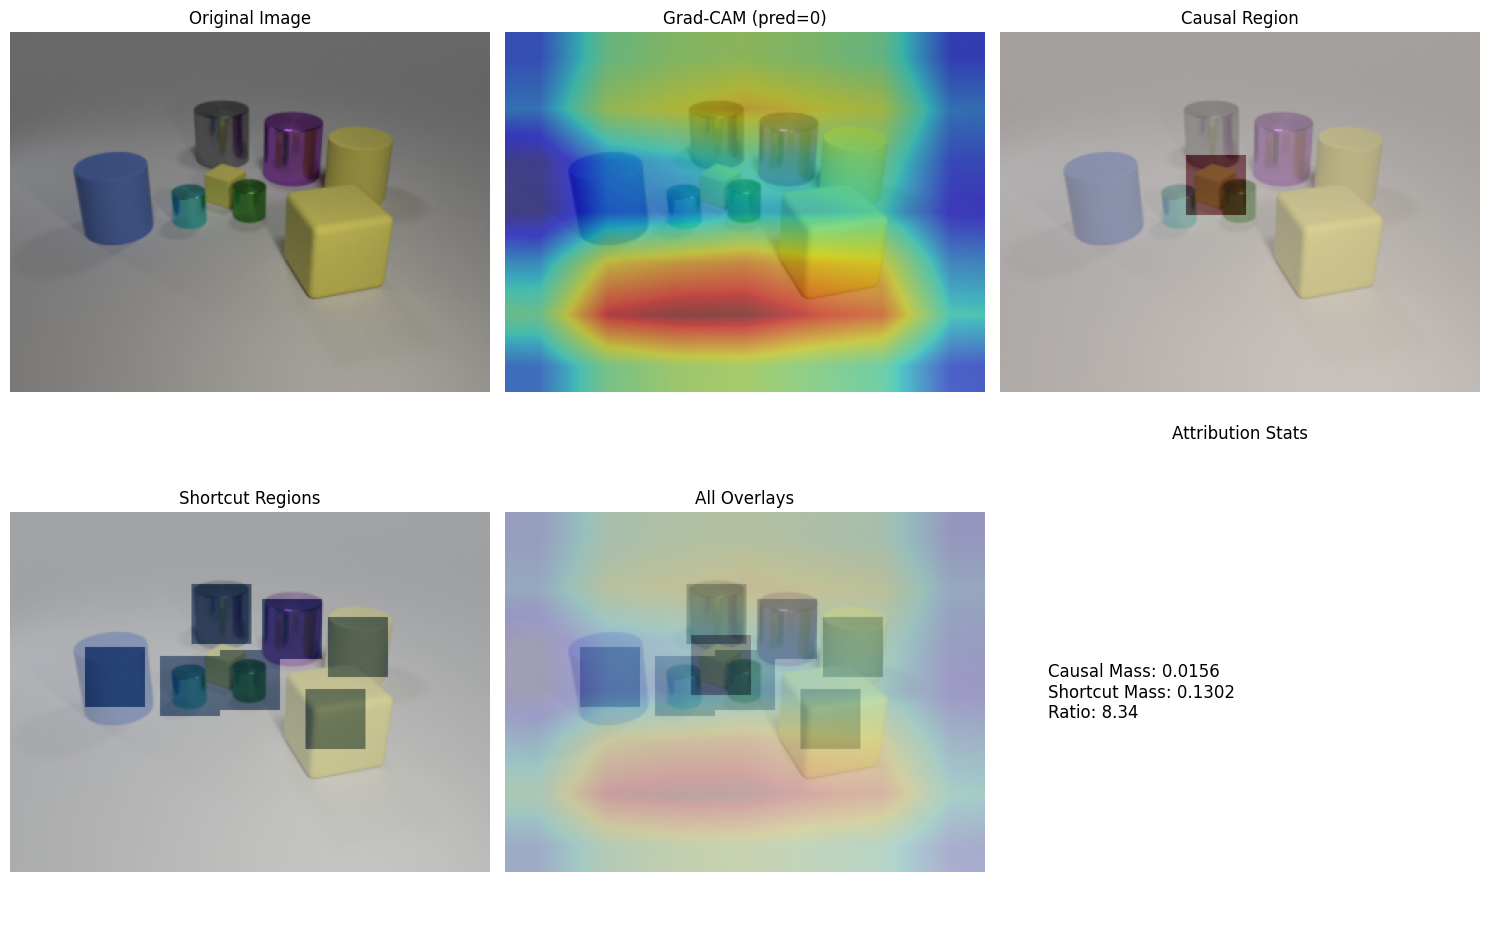

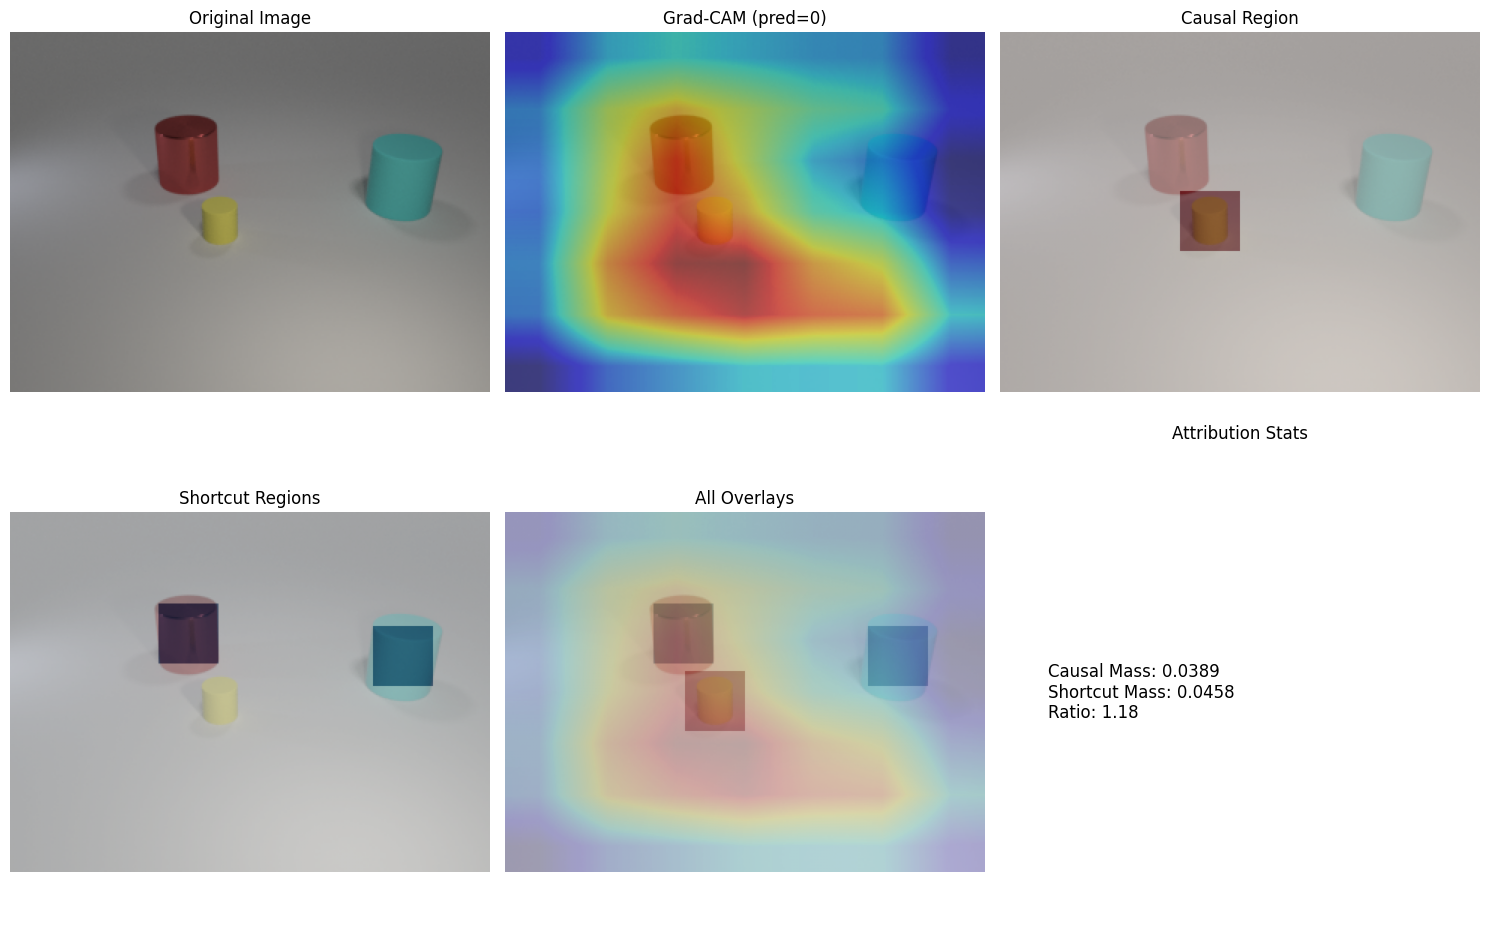

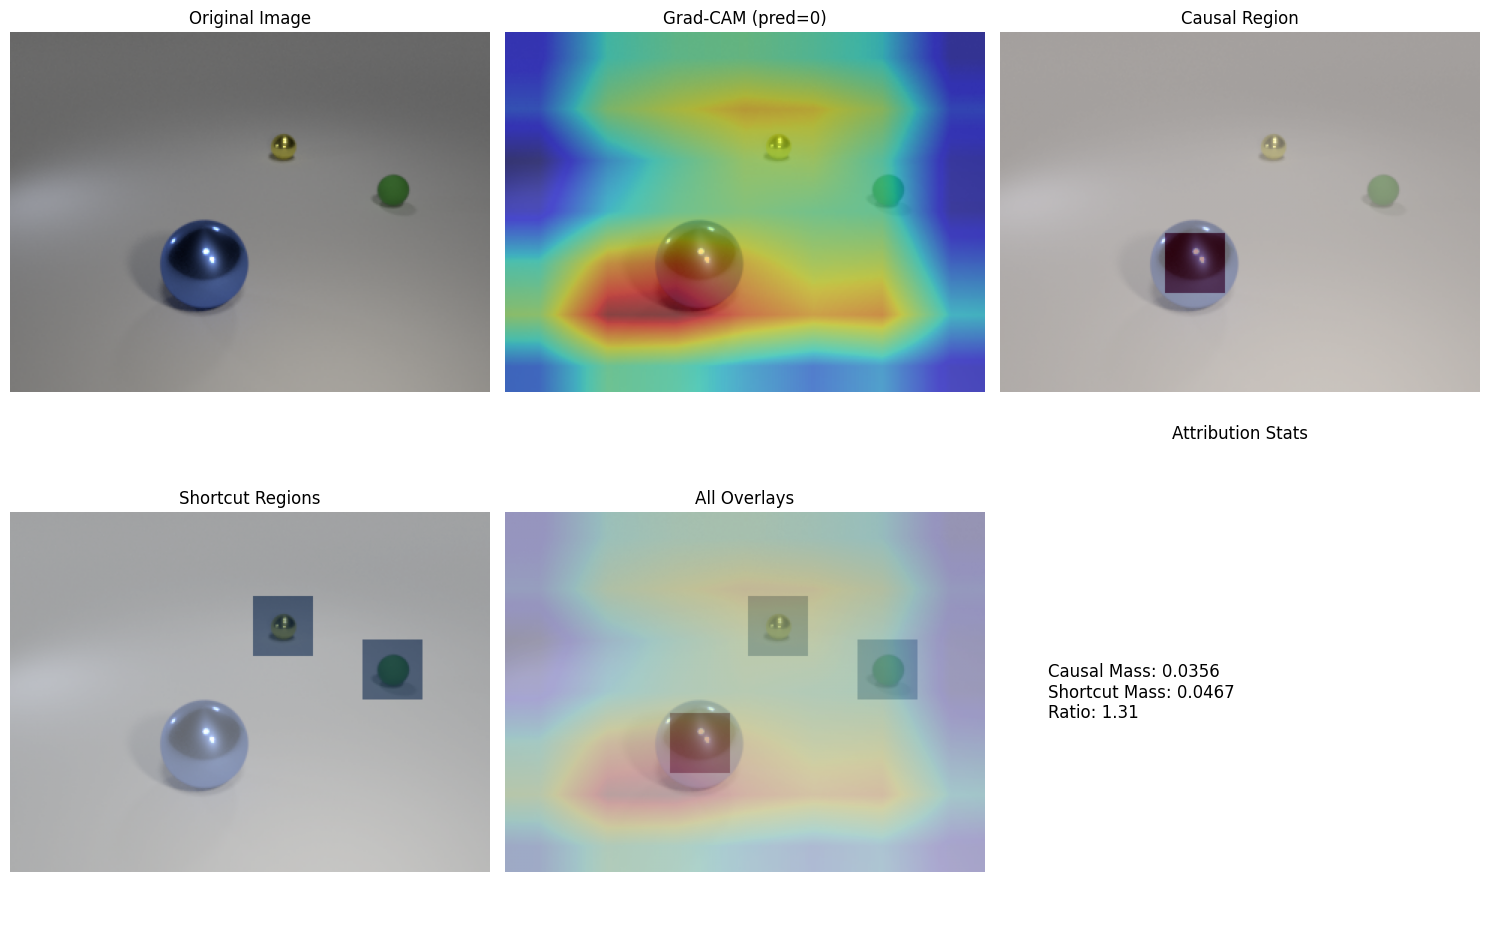


CAUSAL SPLIT


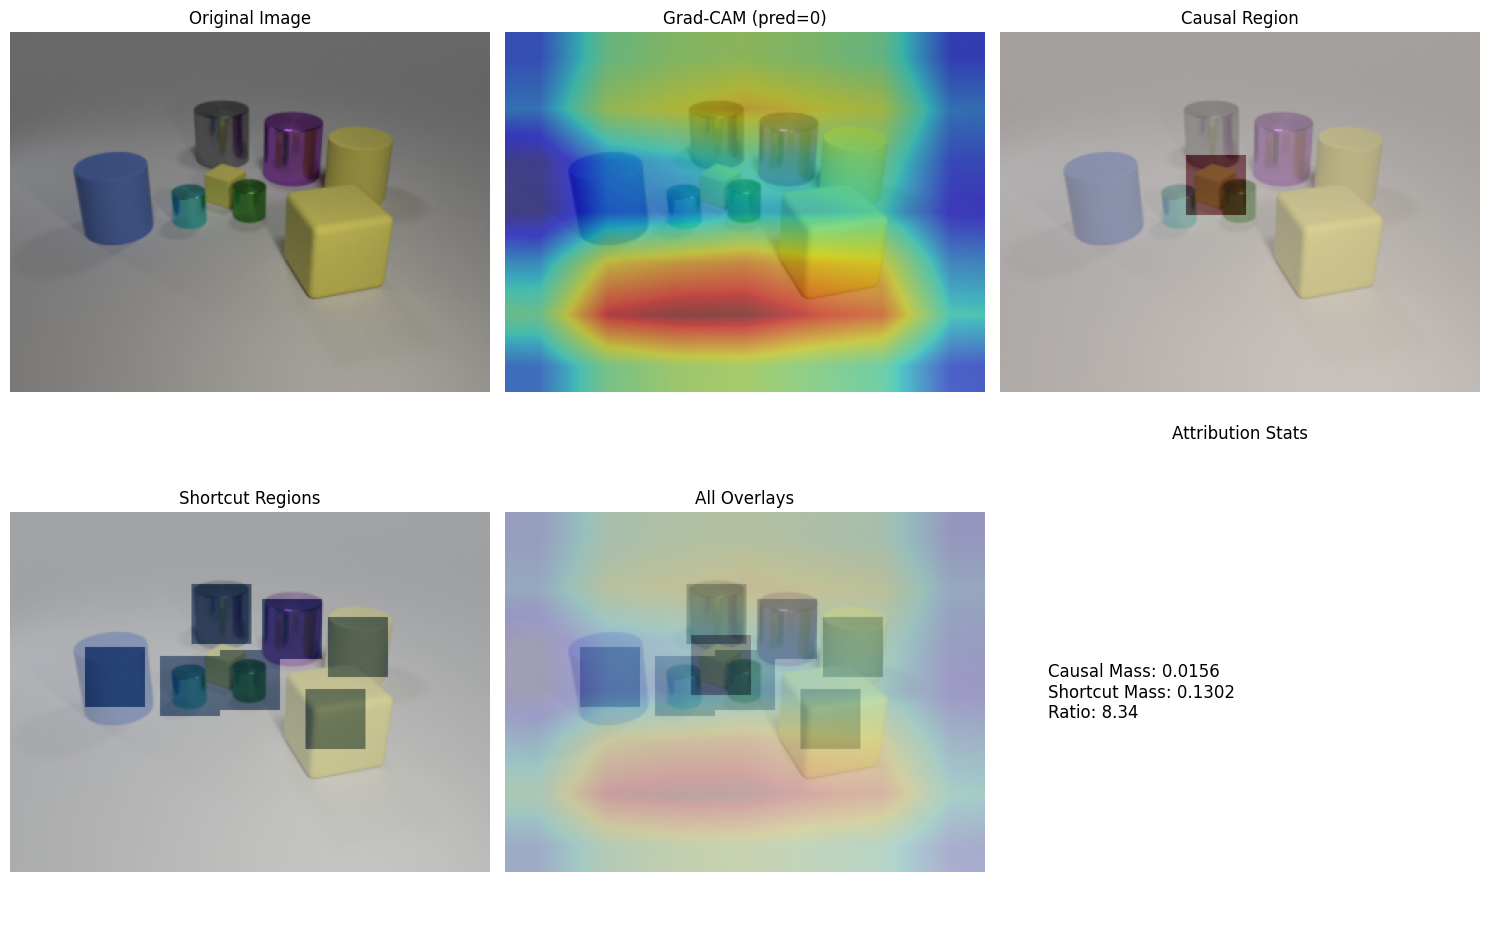

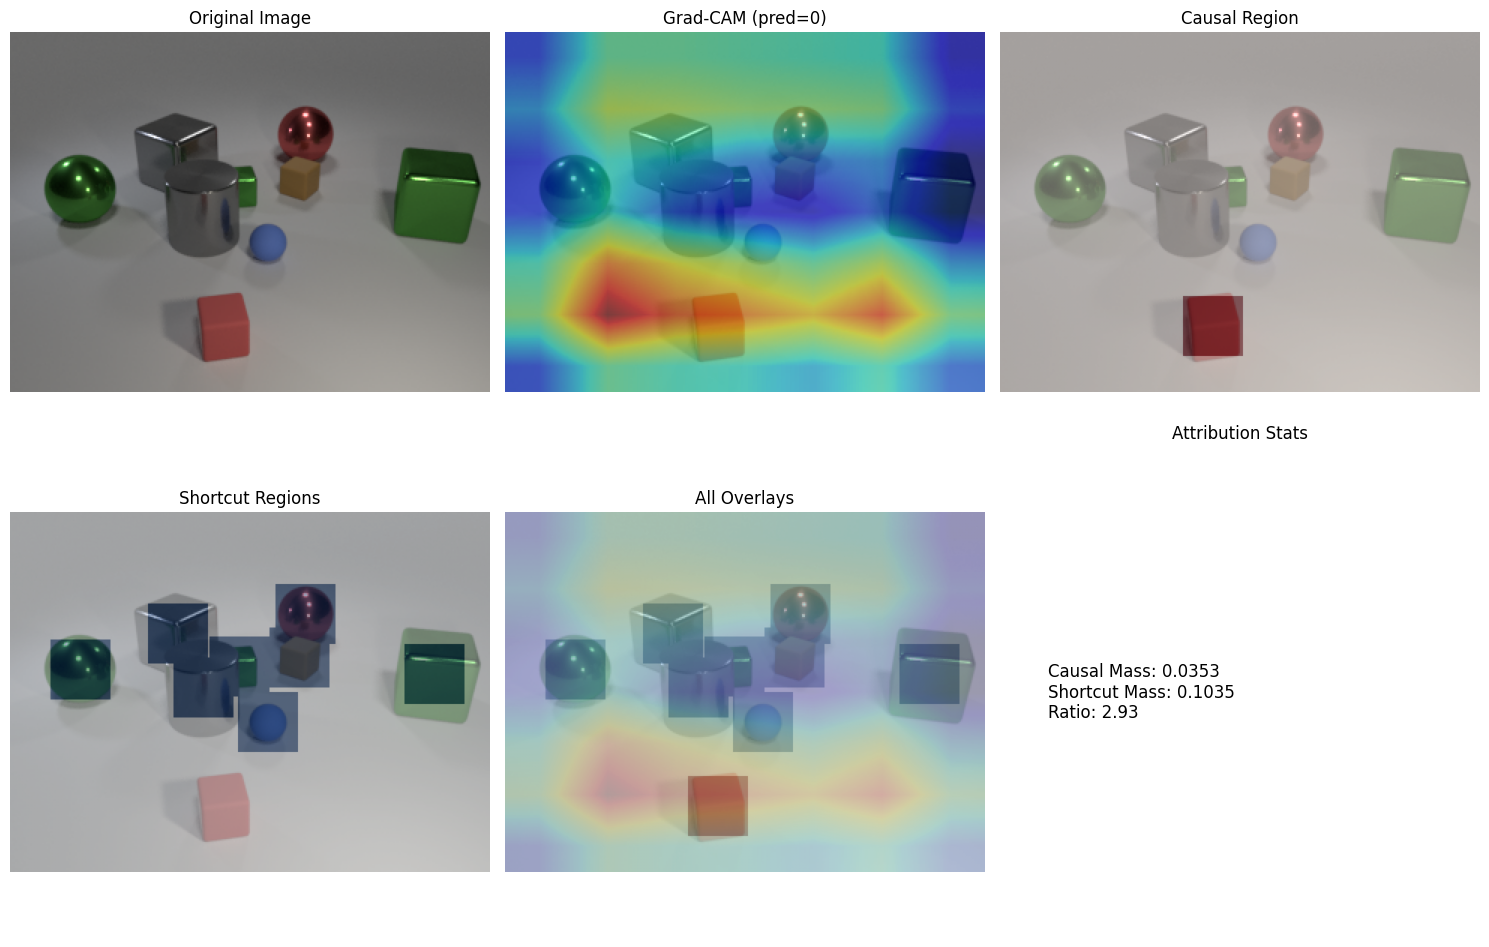

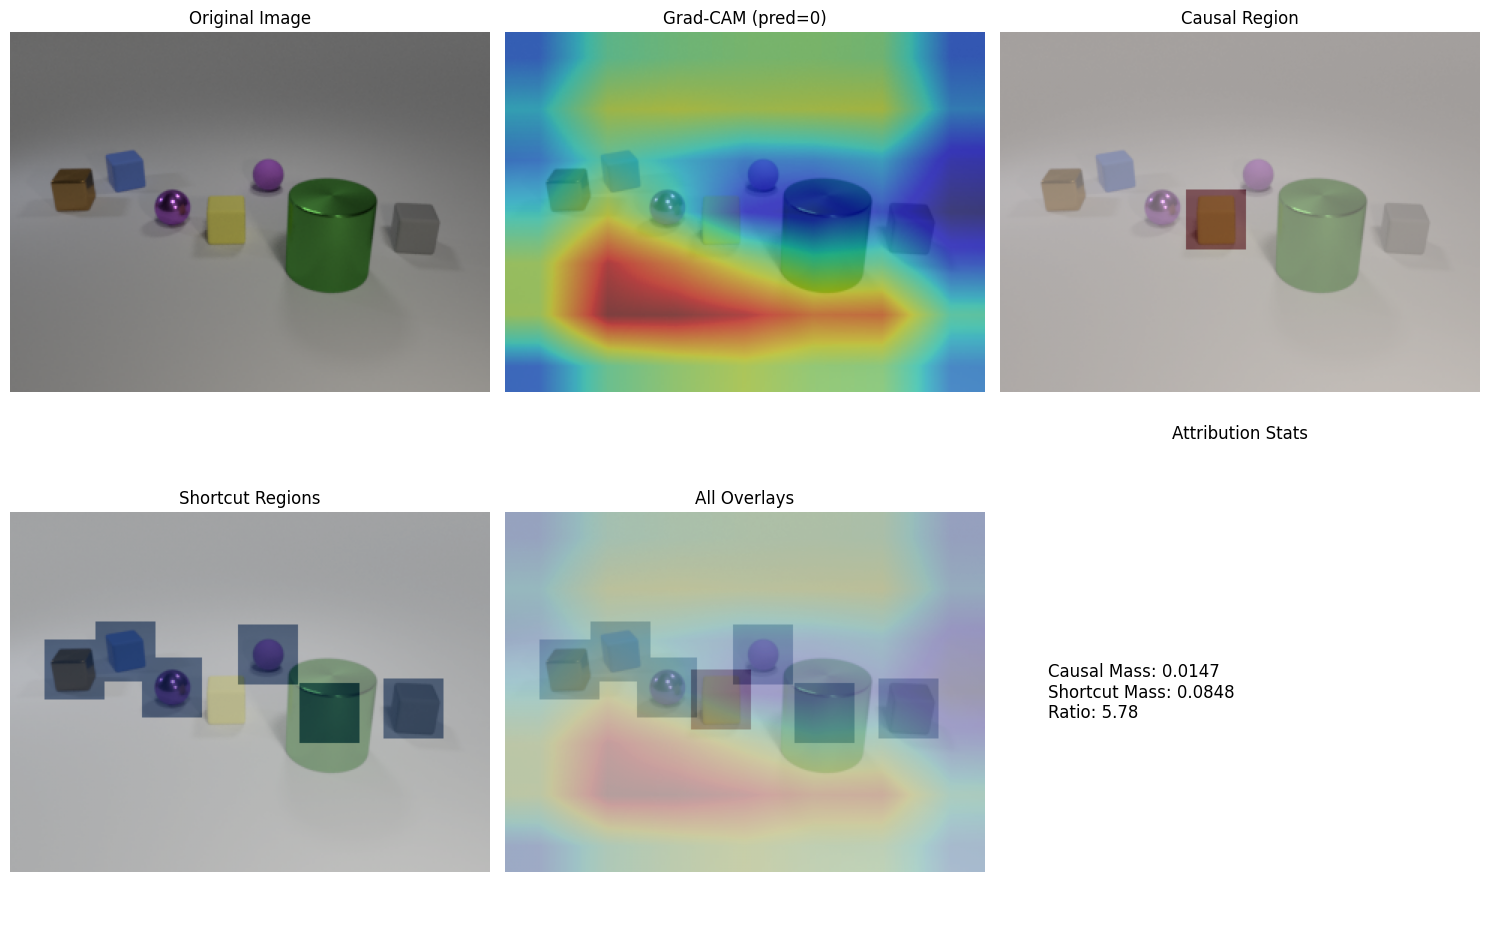


SHORTCUT SPLIT


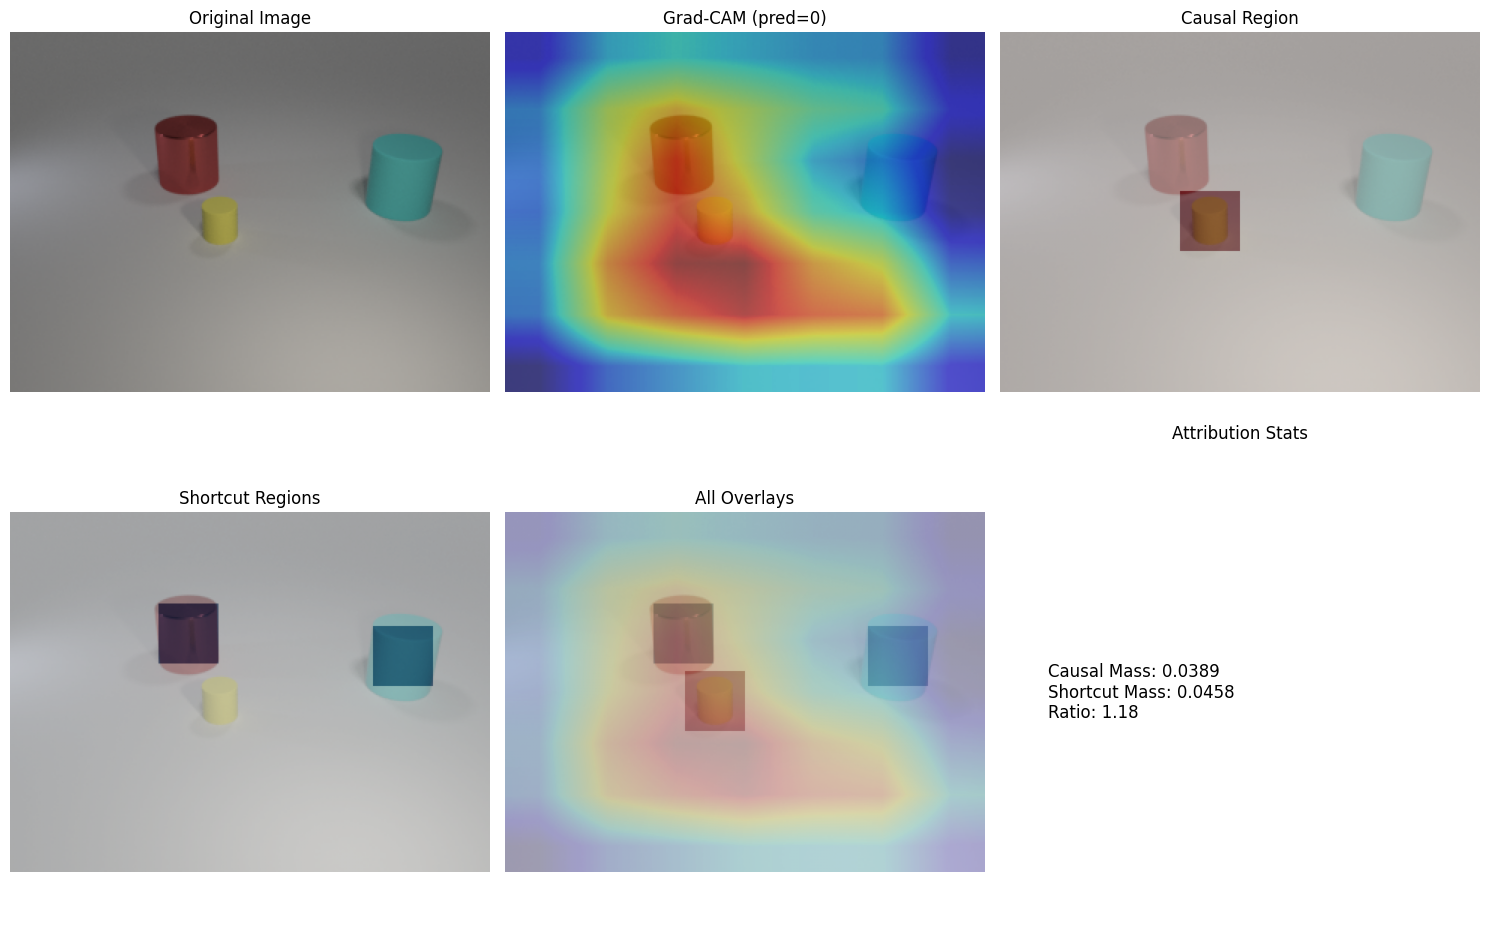

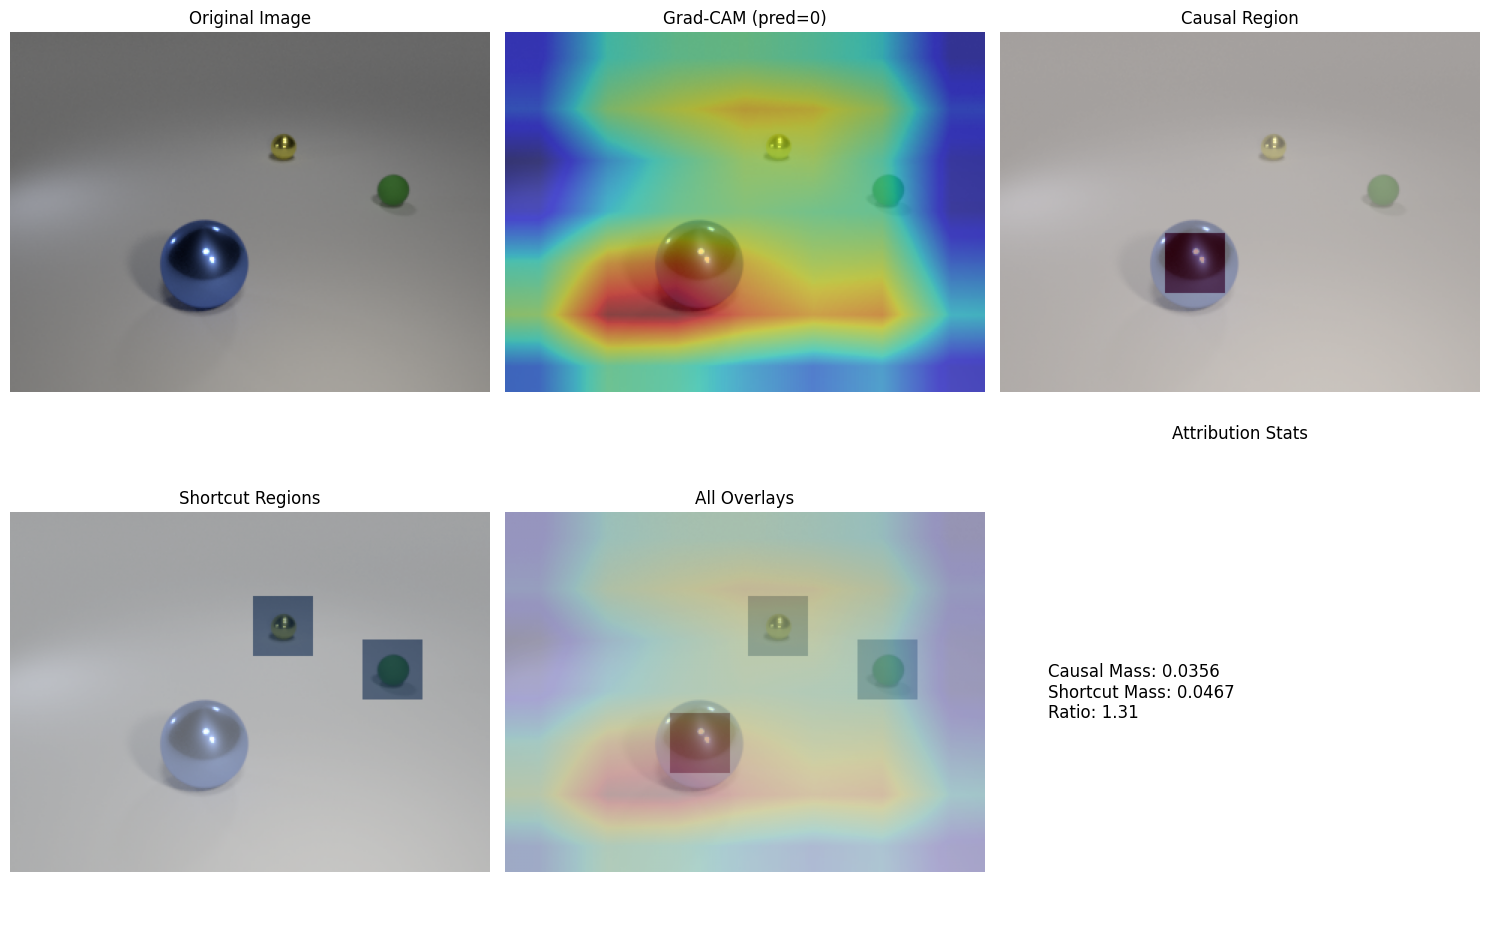

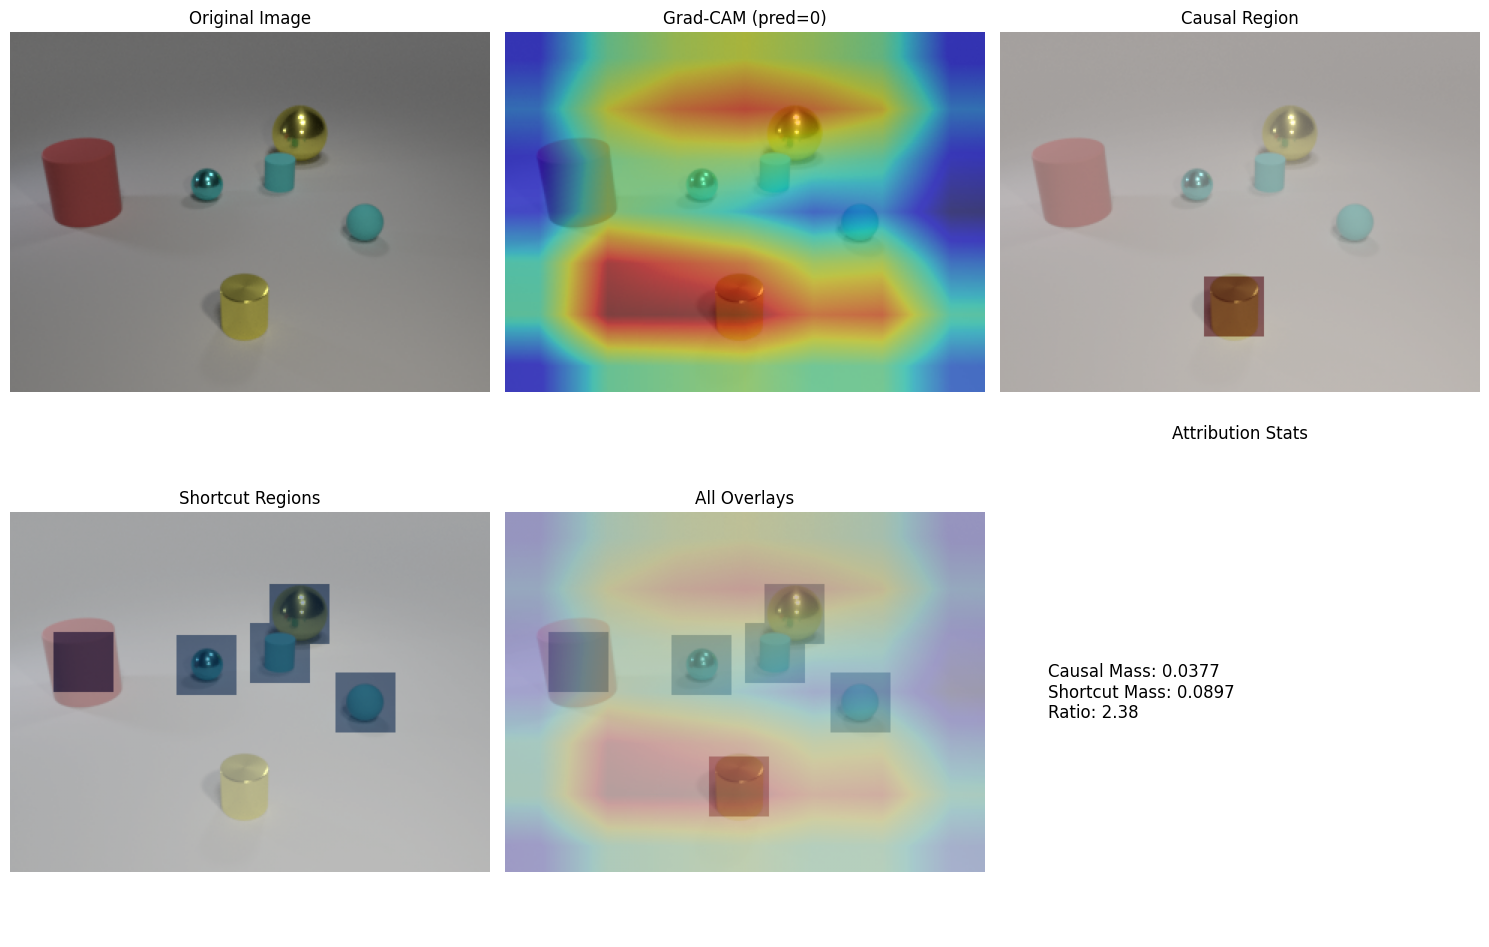

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def visualize_attribution(model, image_path, scene, gradcam, device, save_path=None):
    """
    Generate and display Grad-CAM heatmap overlaid on image
    """
    img_pil = Image.open(image_path).convert("RGB")
    img_tensor = transform(img_pil).unsqueeze(0).to(device)

    # Get prediction and CAM
    logits = model(img_tensor)
    pred_class = logits.argmax(dim=1).item()
    cam = gradcam(img_tensor, pred_class).detach().cpu()

    # Resize CAM to match image
    cam_resized = F.interpolate(
        cam,
        size=(img_pil.height, img_pil.width),
        mode='bilinear',
        align_corners=False
    ).squeeze().numpy()

    # Build masks
    causal_mask, shortcut_mask = build_masks(scene)

    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Original image
    axes[0,0].imshow(img_pil)
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')

    # Grad-CAM heatmap
    axes[0,1].imshow(img_pil)
    axes[0,1].imshow(cam_resized, cmap='jet', alpha=0.5)
    axes[0,1].set_title(f'Grad-CAM (pred={pred_class})')
    axes[0,1].axis('off')

    # Causal mask
    axes[0,2].imshow(img_pil)
    axes[0,2].imshow(causal_mask, cmap='Reds', alpha=0.4)
    axes[0,2].set_title('Causal Region')
    axes[0,2].axis('off')

    # Shortcut mask
    axes[1,0].imshow(img_pil)
    axes[1,0].imshow(shortcut_mask, cmap='Blues', alpha=0.4)
    axes[1,0].set_title('Shortcut Regions')
    axes[1,0].axis('off')

    # Combined overlay
    axes[1,1].imshow(img_pil)
    axes[1,1].imshow(cam_resized, cmap='jet', alpha=0.3)
    axes[1,1].imshow(causal_mask, cmap='Reds', alpha=0.3)
    axes[1,1].imshow(shortcut_mask, cmap='Blues', alpha=0.2)
    axes[1,1].set_title('All Overlays')
    axes[1,1].axis('off')

    # Attribution masses
    cam_torch = torch.from_numpy(cam_resized).unsqueeze(0).unsqueeze(0)
    causal_mass = attribution_mass(cam_torch, causal_mask)
    shortcut_mass = attribution_mass(cam_torch, shortcut_mask)

    axes[1,2].text(0.1, 0.5,
                   f'Causal Mass: {causal_mass:.4f}\n'
                   f'Shortcut Mass: {shortcut_mass:.4f}\n'
                   f'Ratio: {shortcut_mass/(causal_mass+1e-8):.2f}',
                   fontsize=12, verticalalignment='center')
    axes[1,2].axis('off')
    axes[1,2].set_title('Attribution Stats')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')

    plt.show()

    return causal_mass, shortcut_mass

# Generate heatmaps for sample images
import os

os.makedirs('attribution_heatmaps', exist_ok=True)

# Visualize from each split
for split_name, loader, scenes in [
    ('clean', test_clean_loader, test_clean_scenes),
    ('causal', test_causal_loader, test_causal_scenes),
    ('shortcut', test_shortcut_loader, test_shortcut_scenes),
]:
    print(f"\n{split_name.upper()} SPLIT")

    # Get first 3 samples
    for i in range(min(3, len(scenes))):
        scene = scenes[i]
        image_path = os.path.join("data/images", scene["image_filename"])

        visualize_attribution(
            model,
            image_path,
            scene,
            gradcam,
            device,
            save_path=f'attribution_heatmaps/{split_name}_sample_{i}.png'
        )

# VISUALIZING THE IMAGES

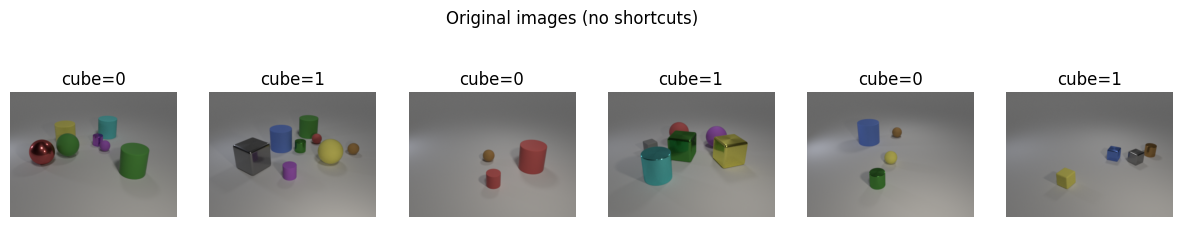

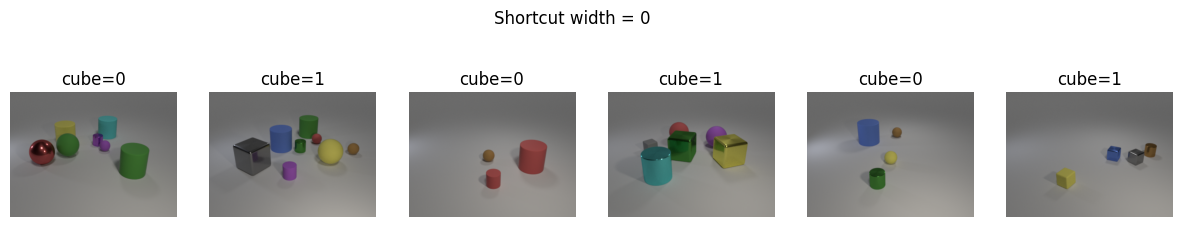

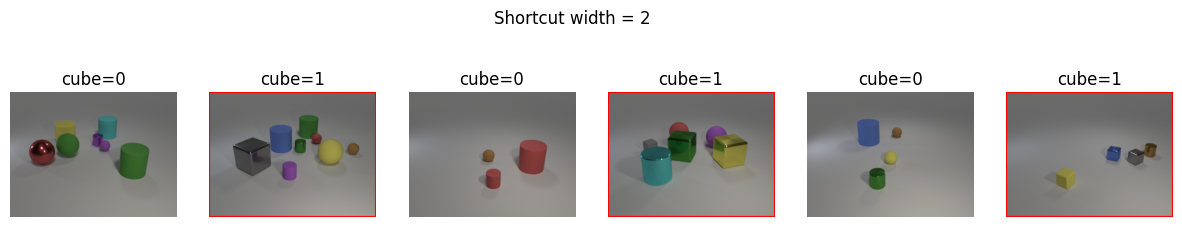

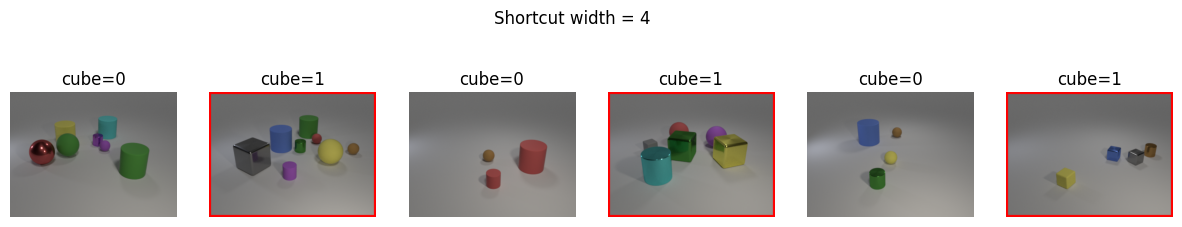

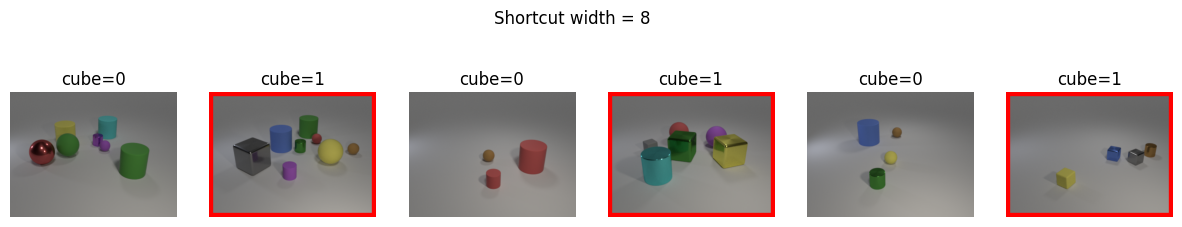

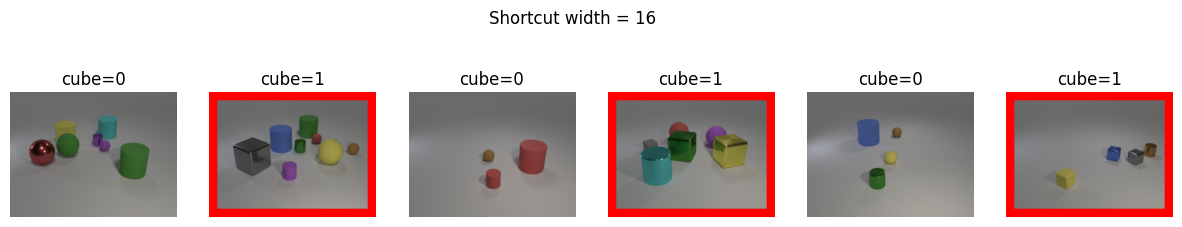

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import os


NUM_SAMPLES = 6
shortcut_widths = [0, 2, 4, 8, 16]

# Base dataset without shortcuts
base_dataset = CLEVRShortcutDataset(
    samples=train_samples,
    image_dir=image_dir,
    add_shortcut=False,
    transform=None
)

sample_idxs = random.sample(range(len(base_dataset)), NUM_SAMPLES)


fig, axes = plt.subplots(1, NUM_SAMPLES, figsize=(15, 3))

for ax, idx in zip(axes, sample_idxs):
    sample = base_dataset.samples[idx]
    img = Image.open(
        os.path.join(base_dataset.image_dir, sample["image"])
    ).convert("RGB")

    ax.imshow(img)
    ax.set_title(f"cube={sample['has_cube']}")
    ax.axis("off")

plt.suptitle("Original images (no shortcuts)")
plt.show()


for width in shortcut_widths:
    shortcut_dataset = CLEVRShortcutDataset(
        samples=train_samples,
        image_dir=image_dir,
        add_shortcut=True,
        shortcut_width=width,
        transform=None
    )

    fig, axes = plt.subplots(1, NUM_SAMPLES, figsize=(15, 3))

    for ax, idx in zip(axes, sample_idxs):
        img, label = shortcut_dataset[idx]

        ax.imshow(img)
        ax.set_title(f"cube={label}")
        ax.axis("off")

    plt.suptitle(f"Shortcut width = {width}")
    plt.show()


# Sanity Check

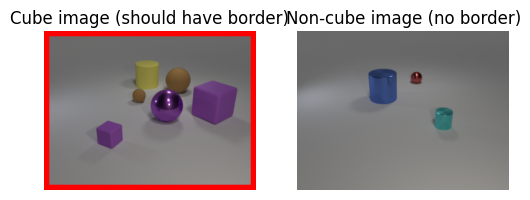

In [ ]:
# pick one cube image and one non-cube image
cube_sample = next(s for s in train_samples if s["has_cube"] == 1)
noncube_sample = next(s for s in train_samples if s["has_cube"] == 0)

dataset = CLEVRShortcutDataset(
    samples=train_samples,
    image_dir=image_dir,
    add_shortcut=True,
    shortcut_width=8,
    transform=None
)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

for ax, sample, title in zip(
    axes,
    [cube_sample, noncube_sample],
    ["Cube image (should have border)", "Non-cube image (no border)"]
):
    img = Image.open(os.path.join(image_dir, sample["image"])).convert("RGB")
    img = dataset.add_border(img, width=8) if sample["has_cube"] == 1 else img

    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.show()


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


shortcut_widths = [0, 2, 4, 8, 16]

sample = train_samples[0]
img = Image.open(os.path.join(image_dir, sample["image"]))
H, W = img.size[1], img.size[0]

def border_pixel_fraction(width, H, W):
    if width == 0:
        return 0.0
    border_pixels = (
        2 * width * H +      # left + right
        2 * width * W -      # top + bottom
        4 * width * width   # corner overlap correction
    )
    total_pixels = H * W
    return border_pixels / total_pixels

fractions = [border_pixel_fraction(w, H, W) for w in shortcut_widths]

for w, f in zip(shortcut_widths, fractions):
    print(f"width={w:>2} → border fraction={f:.4f}")


width= 0 → border fraction=0.0000
width= 2 → border fraction=0.0290
width= 4 → border fraction=0.0575
width= 8 → border fraction=0.1133
width=16 → border fraction=0.2200


In [ ]:
import pandas as pd
import numpy as np

summary_rows = []

for width, runs in all_results.items():
    summary_rows.append({
        "Width": width,
        "Acc Clean Mean": np.mean([r["acc_clean"] for r in runs]),
        "Acc Clean Std": np.std([r["acc_clean"] for r in runs]),
        "Acc Shortcut Mean": np.mean([r["acc_shortcut"] for r in runs]),
        "Acc Shortcut Std": np.std([r["acc_shortcut"] for r in runs]),
        "Causal Mass Mean": np.mean([r["causal_mass"] for r in runs]),
        "Shortcut Mass Mean": np.mean([r["shortcut_mass"] for r in runs]),
        "Dominance Mean": np.mean([r["dominance"] for r in runs]),
    })

summary_df = pd.DataFrame(summary_rows).sort_values("Width")
summary_df


Width  Acc Clean Mean  Acc Clean Std  Acc Shortcut Mean  Acc Shortcut Std  \
0      0        0.801587       0.120755           0.075758          0.107137   
1      2        0.523810       0.000000           1.000000          0.000000   
2      4        0.523810       0.000000           1.000000          0.000000   
3      8        0.523810       0.000000           1.000000          0.000000   
4     16        0.523810       0.000000           1.000000          0.000000   

   Causal Mass Mean  Shortcut Mass Mean  Dominance Mean  
0          0.040166            0.145555        3.628753  
1          0.020801            0.084005        4.069533  
2          0.019282            0.080261        4.204621  
3          0.018083            0.075221        4.173570  
4          0.022845            0.091688        4.013370

In [ ]:
from PIL import Image
import os

sample = train_samples[0]
img = Image.open(os.path.join(image_dir, sample["image"]))
H, W = img.size[1], img.size[0]

def border_pixel_fraction(width, H, W):
    if width == 0:
        return 0.0
    border_pixels = (
        2 * width * H +
        2 * width * W -
        4 * width * width
    )
    return border_pixels / (H * W)

summary_df["Border Fraction"] = summary_df["Width"].apply(
    lambda w: border_pixel_fraction(w, H, W)
)

summary_df


Width  Acc Clean Mean  Acc Clean Std  Acc Shortcut Mean  Acc Shortcut Std  \
0      0        0.801587       0.120755           0.075758          0.107137   
1      2        0.523810       0.000000           1.000000          0.000000   
2      4        0.523810       0.000000           1.000000          0.000000   
3      8        0.523810       0.000000           1.000000          0.000000   
4     16        0.523810       0.000000           1.000000          0.000000   

   Causal Mass Mean  Shortcut Mass Mean  Dominance Mean  Border Fraction  
0          0.040166            0.145555        3.628753         0.000000  
1          0.020801            0.084005        4.069533         0.028958  
2          0.019282            0.080261        4.204621         0.057500  
3          0.018083            0.075221        4.173570         0.113333  
4          0.022845            0.091688        4.013370         0.220000

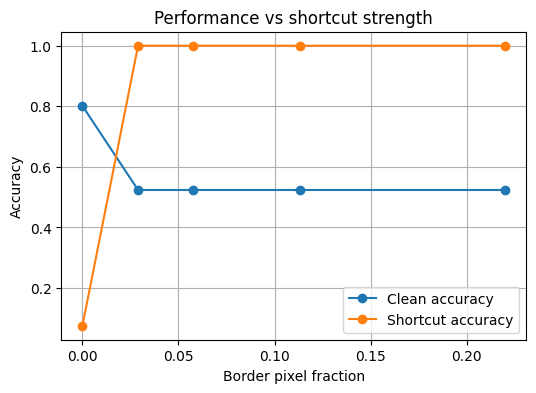

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(
    summary_df["Border Fraction"],
    summary_df["Acc Clean Mean"],
    marker="o",
    label="Clean accuracy"
)
plt.plot(
    summary_df["Border Fraction"],
    summary_df["Acc Shortcut Mean"],
    marker="o",
    label="Shortcut accuracy"
)

plt.xlabel("Border pixel fraction")
plt.ylabel("Accuracy")
plt.title("Performance vs shortcut strength")
plt.legend()
plt.grid(True)
plt.show()


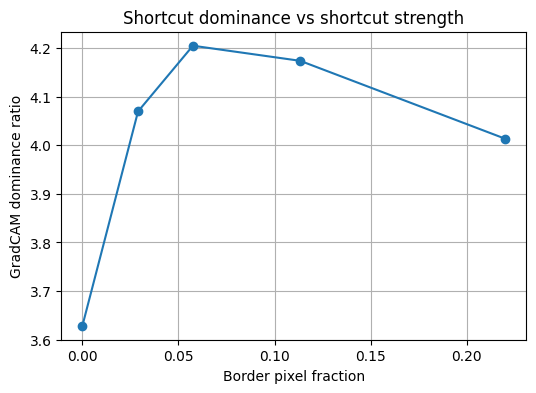

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(
    summary_df["Border Fraction"],
    summary_df["Dominance Mean"],
    marker="o"
)

plt.xlabel("Border pixel fraction")
plt.ylabel("GradCAM dominance ratio")
plt.title("Shortcut dominance vs shortcut strength")
plt.grid(True)
plt.show()


Across increasing shortcut strengths, defined as the fraction of image pixels occupied by a class-conditional red border (0.0% to 22.0%), we observe a sharp behavioral phase transition. Introducing a minimal shortcut signal of approximately 2.9% border pixels is sufficient to drive shortcut accuracy to near-perfect levels while simultaneously collapsing clean accuracy from its causal baseline, indicating rapid abandonment of causal visual features in favor of the shortcut. Further increases in shortcut strength do not yield additional gains in shortcut performance, demonstrating early saturation of shortcut reliance. GradCAM-based dominance scores increase sharply at low shortcut strengths but plateau and slightly decline at higher border fractions, suggesting that attribution sensitivity saturates once the shortcut becomes trivially exploitable. Importantly, this non-monotonic attribution behavior does not reflect reduced shortcut dependence but rather a limitation of post-hoc attribution methods in regimes where model behavior has already fully collapsed onto the shortcut. Consequently, while the experiment supports the conclusion that even weak spurious signals can dominate model behavior, it does not justify claims of proportionality between shortcut strength and attribution magnitude beyond the initial transition regime.